In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
import plotly.express as px
import nbformat 
import plotly.io as pio


# Historical Data Analysis

In [37]:
msft = yf.Ticker("MSFT")
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [38]:
#get historical market data
hist = msft.history(period="max")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059947,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059946,0.063158,0.059946,0.062087,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059946,0.060482,47894400,0.0,0.0


In [39]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-26 00:00:00-04:00,416.369995,417.279999,411.339996,413.489990,13152800,0.0,0.0
2024-08-27 00:00:00-04:00,412.859985,414.359985,410.250000,413.839996,13492900,0.0,0.0
2024-08-28 00:00:00-04:00,414.880005,415.000000,407.309998,410.600006,14882700,0.0,0.0
2024-08-29 00:00:00-04:00,414.940002,422.049988,410.600006,413.119995,17045200,0.0,0.0
2024-08-30 00:00:00-04:00,415.600006,417.489990,412.130005,417.140015,24298300,0.0,0.0


In [44]:
fig = px.line(hist, x=hist.index, y=['Close','Low', 'High', 'Open'], title='Microsoft Stock Analysis')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

msft = yf.Ticker("MSFT")
hist = msft.history(period="max")

fig = make_subplots(rows=1, cols=4, subplot_titles=['Close', 'Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=hist.index, y=hist['Close']), row=1, col=1)
fig.add_trace(go.Scatter(x=hist.index, y=hist['Open']), row=1, col=4)
fig.add_trace(go.Scatter(x=hist.index, y=hist['High']), row=1, col=3)
fig.add_trace(go.Scatter(x=hist.index, y=hist['Low']), row=1, col=2)

fig.update_layout(height=400, width=1200, title_text='Microsoft Stock Analysis')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [46]:
#show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1725048001,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 417.14,
 'fiftyTwoWeekHigh': 417.45,
 'fiftyTwoWeekLow': 412.13,
 'regularMarketDayHigh': 417.45,
 'regularMarketDayLow': 412.13,
 'regularMarketVolume': 22442219,
 'longName': 'Microsoft Corporation',
 'shortName': 'Microsoft Corporation',
 'chartPreviousClose': 0.097,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1725004800,
   'end': 1725024600,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1725024600,
   'end': 1725048000,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1725048000,
   'end': 1725062400,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '',
 'validRange

In [47]:
tickers = yf.Tickers('msft aapl amzn goog tsla nvda meta')

#access each ticker using (example)
tickers.tickers['MSFT'].info
tickers.tickers['AAPL'].history(period="1mo")
tickers.tickers['GOOG'].actions

,Dividends,Stock Splits
Date,,
2014-03-27 00:00:00-04:00,0.0,2.002000
2015-04-27 00:00:00-04:00,0.0,1.002746
2022-07-18 00:00:00-04:00,0.0,20.000000
2024-06-10 00:00:00-04:00,0.2,0.000000


In [48]:
#show actions (dividends, splits, capital gains)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21 00:00:00-04:00,0.00,2.0
1990-04-16 00:00:00-04:00,0.00,2.0
1991-06-27 00:00:00-04:00,0.00,1.5
1992-06-15 00:00:00-04:00,0.00,1.5
1994-05-23 00:00:00-04:00,0.00,2.0
...,...,...
2023-08-16 00:00:00-04:00,0.68,0.0
2023-11-15 00:00:00-05:00,0.75,0.0
2024-02-14 00:00:00-05:00,0.75,0.0


In [49]:
#show share count
msft.get_shares_full(start="2022-01-01", end=None)

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
                                ...    
2024-08-27 00:00:00-04:00    7490189824
2024-08-29 00:00:00-04:00    7491689984
2024-08-29 00:00:00-04:00    7433039872
2024-08-30 00:00:00-04:00    7433039872
2024-08-31 00:00:00-04:00    7433039872
Length: 239, dtype: int64

In [50]:
#show financials:
#- income statement and 
msft.income_stmt
msft.quarterly_income_stmt
#-balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
#-cash flow statement
msft.cash_flow
msft.quarterly_cash_flow
#see 'Ticker.get_income_stmt()' for more options

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Free Cash Flow,23322000000.0,20965000000.0,9118000000.0,20666000000.0,19827000000.0,NaN
Repurchase Of Capital Stock,-4210000000.0,-4213000000.0,-4000000000.0,-4831000000.0,-5704000000.0,NaN
Repayment Of Debt,-13065000000.0,-11589000000.0,-2916000000.0,-1500000000.0,-1000000000.0,NaN
Issuance Of Debt,5447000000.0,6352000000.0,10773000000.0,25765000000.0,NaN,0.0
Issuance Of Capital Stock,534000000.0,522000000.0,261000000.0,685000000.0,512000000.0,NaN
Capital Expenditure,-13873000000.0,-10952000000.0,-9735000000.0,-9917000000.0,-8943000000.0,NaN
End Cash Position,18315000000.0,19634000000.0,17305000000.0,80452000000.0,34704000000.0,NaN
Beginning Cash Position,19634000000.0,17305000000.0,80452000000.0,34704000000.0,26562000000.0,NaN
Effect Of Exchange Rate Changes,-103000000.0,-80000000.0,72000000.0,-99000000.0,-81000000.0,NaN
Changes In Cash,-1216000000.0,2409000000.0,-63219000000.0,45847000000.0,8223000000.0,NaN


# Descriptive Statistics

In [52]:
import pandas as pd

# Load dataset
df = pd.read_csv('raw_analyst_ratings.csv')

In [53]:
# Calculate the length of each headline

In [54]:
df['headline_length'] = df['headline'].str.len()

In [55]:
# Get basic statistics
length_stats = df['headline_length'].describe()

# Display the basic statistics
print(length_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [56]:
# Additional statistics
variance = df['headline_length'].var()    # Variance
mode = df['headline_length'].mode()       # Mode
range_length = df['headline_length'].max() - df['headline_length'].min()  # Range

print(f"Variance: {variance}")
print(f"Mode: {mode.values}")
print(f"Range: {range_length}")

Variance: 1659.3654752520772
Mode: [47]
Range: 509


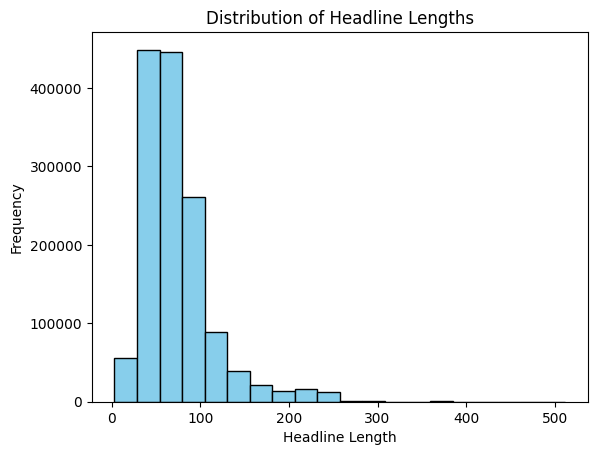

In [57]:
import matplotlib.pyplot as plt

# Plot histogram of headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

In [58]:
# Count the number of articles per publisher to identify which publishers 
# are most active

In [59]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the results
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


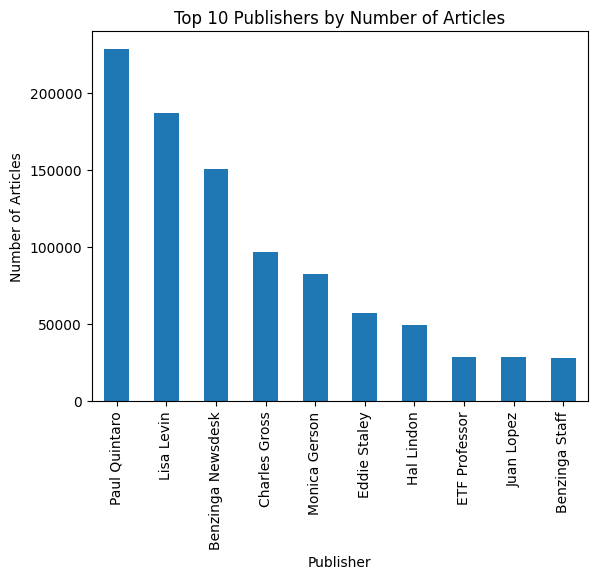

In [60]:
# Plot the number of articles per publisher
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [61]:
# Analyze the publication dates to see trends over time, 
# such as increased news frequency on particular days or during specific events.

In [62]:
# Convert the publication date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [63]:
# Convert the 'date' column to datetime, allowing for mixed formats
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [64]:
# Handle missing or invalid dates
df = df.dropna(subset=['date'])

# Convert to UTC from a specific timezone (e.g., Eastern Time)
#df['date'] = df['date'].dt.tz_localize('America/New_York', ambiguous='NaT').dt.tz_convert('UTC')
print(df['date'].head())

0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]


In [65]:
# Extract UTC date components
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour

# Group by day of the week, month, and hour
day_of_week_counts = df['day_of_week'].value_counts().sort_index()
monthly_counts = df['month'].value_counts().sort_index()
hourly_counts = df['hour'].value_counts().sort_index()

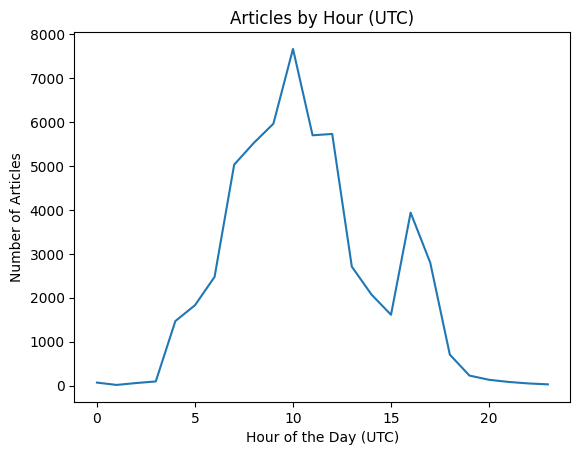

In [66]:
# Visualize the data

hourly_counts.plot(kind='line', title='Articles by Hour (UTC)')
plt.xlabel('Hour of the Day (UTC)')
plt.ylabel('Number of Articles')
plt.show()

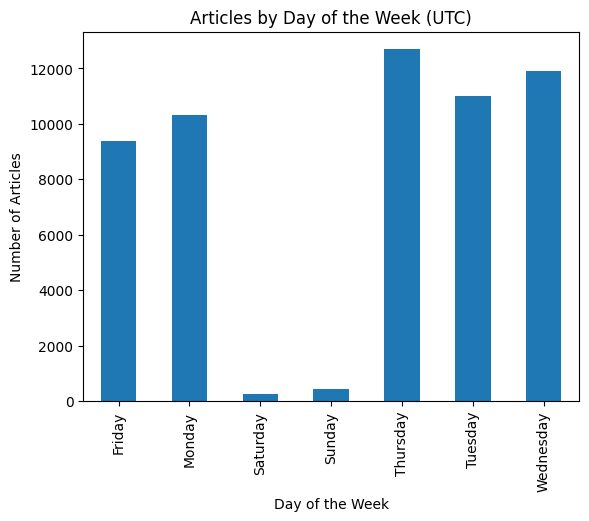

In [67]:
day_of_week_counts.plot(kind='bar', title='Articles by Day of the Week (UTC)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

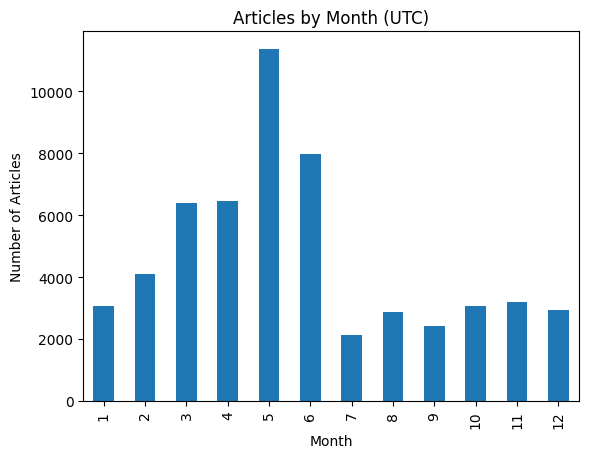

In [68]:
monthly_counts.plot(kind='bar', title='Articles by Month (UTC)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()

# Text Analysis

# 1. Sentiment Analysis

In [69]:
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

# read the CSV 
data = pd.read_csv('raw_analyst_ratings.csv')

data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [70]:
#Check for null value
print(data.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [72]:
data.shape

(1407328, 6)

In [73]:
time_data = data['date'].apply(lambda x: len(x.split()) > 1)
print(time_data.sum())

1407328


In [74]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hello\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
sentiment_data=data.copy()
sia = SentimentIntensityAnalyzer()

In [76]:
# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000


In [77]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,Neutral
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,Neutral


In [78]:
sentiment_data['sentiment_category'].value_counts()

sentiment_category
Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: count, dtype: int64

In [79]:
print(sentiment_data['date'].min(), sentiment_data['date'].max())

2009-02-14 00:00:00 2020-06-11 17:12:35-04:00


# Time Series Analysis

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Simulating data
#np.random.seed(0)
data = pd.date_range(start="2020-01-01", end="2020-02-01", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(data))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'date': data, 'headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(simulated_data['headlines_Count'], model='additive', period=7)


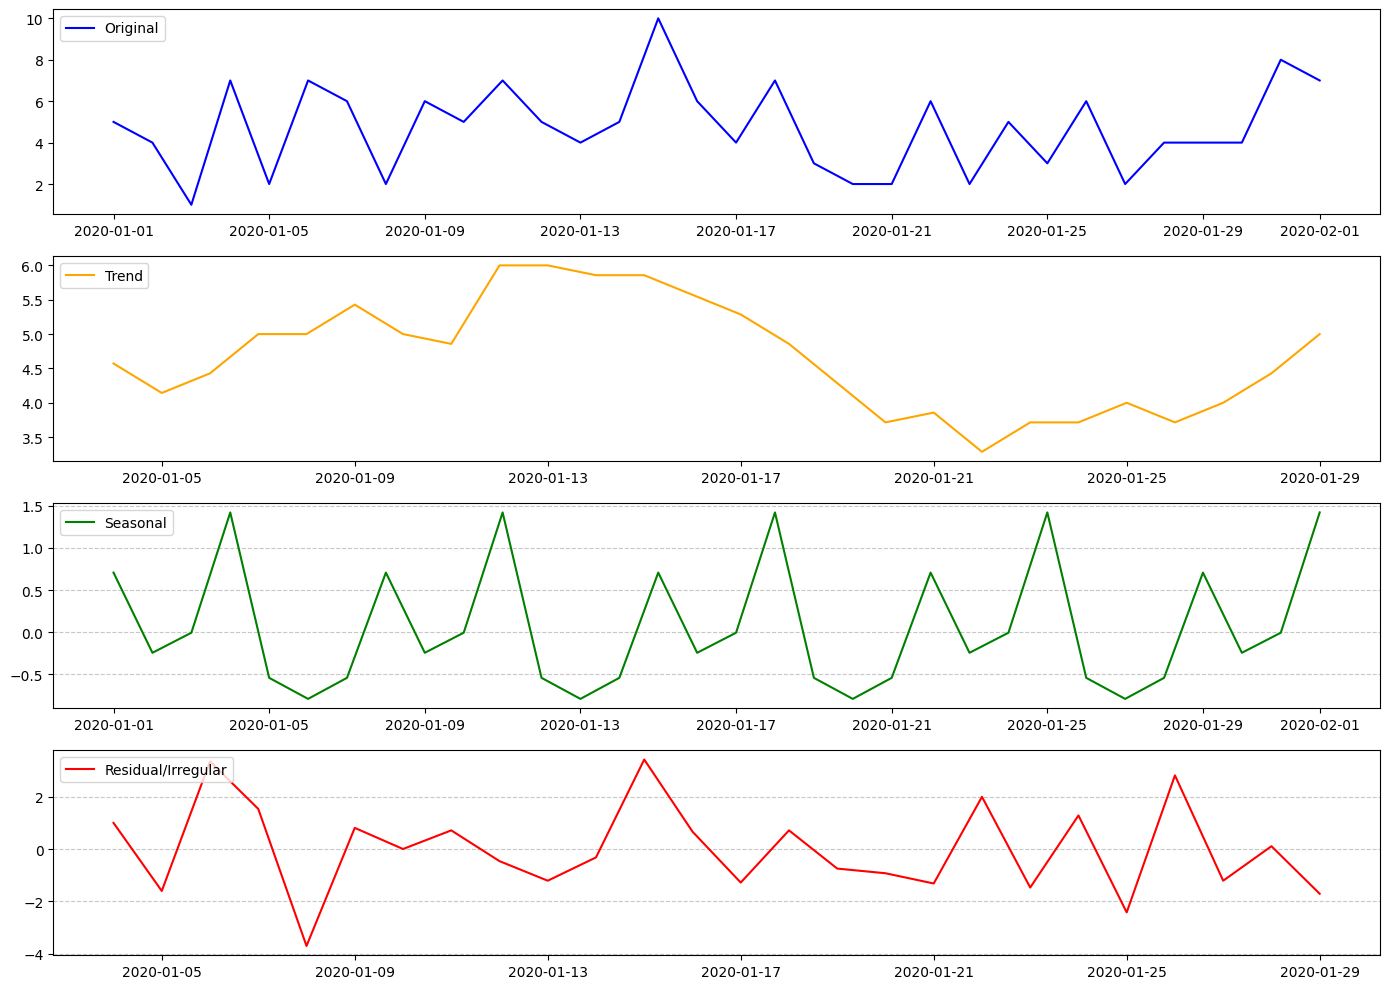

In [102]:
# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(simulated_data['headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

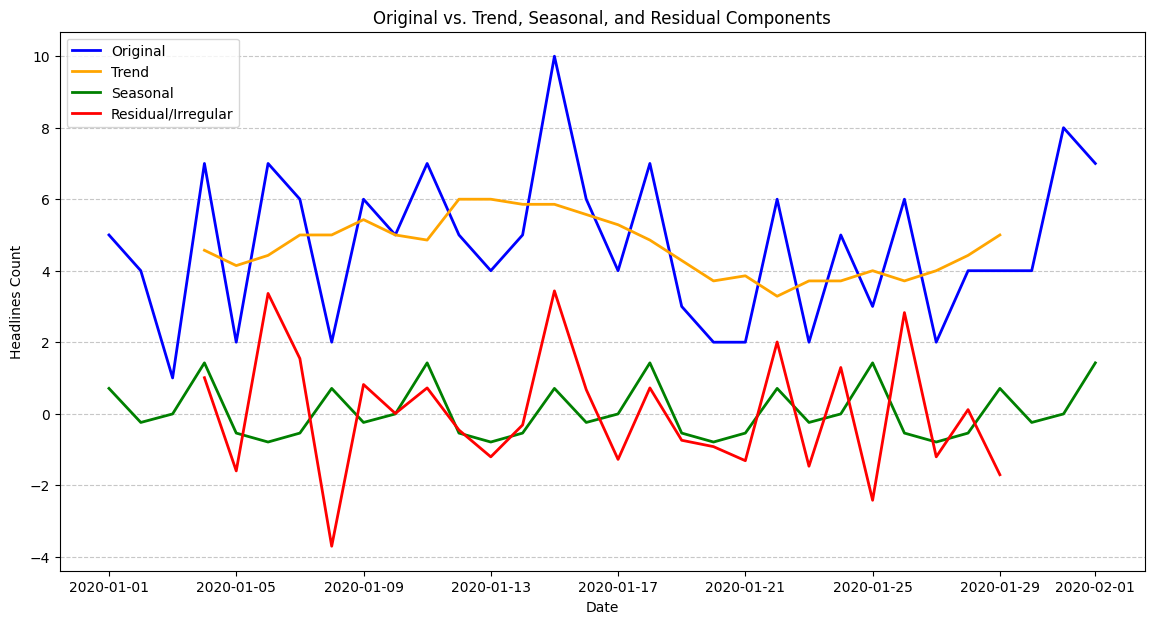

In [103]:
# Plotting all components in a single graph for comparison
plt.figure(figsize=(14, 7))

plt.plot(simulated_data['headlines_Count'], label='Original', color='blue', linewidth=2)
plt.plot(decomposition.trend, label='Trend', color='orange', linewidth=2)
plt.plot(decomposition.seasonal, label='Seasonal', color='green', linewidth=2)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red', linewidth=2)

plt.legend(loc='upper left')
plt.title('Original vs. Trend, Seasonal, and Residual Components')
plt.xlabel('Date')
plt.ylabel('Headlines Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file (ensure 'date' column is in datetime format)
data = pd.read_csv('raw_analyst_ratings.csv', parse_dates=['date'])

# Convert the 'date' column to datetime, handling errors if any
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows where the 'date' conversion failed (i.e., rows with NaT in 'date')
data.dropna(subset=['date'], inplace=True)

# Extract the hour from the date column
data['hour'] = data['date'].dt.hour

# Group by hour to count the number of news articles published each hour
hourly_distribution = data.groupby('hour').size()


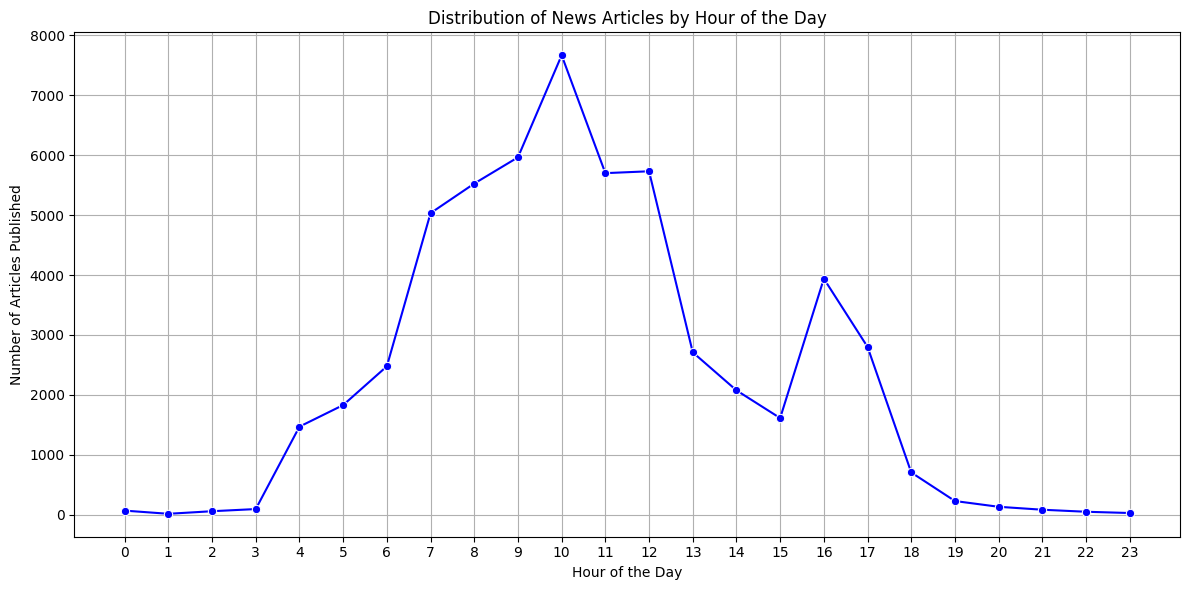

In [112]:
# Plot the distribution of news articles by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_distribution.index, y=hourly_distribution.values, marker='o', color='blue')

plt.title('Distribution of News Articles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()

# Display the plot
plt.show()

In [113]:
# Identify the hour with the highest number of publications
peak_hour = hourly_distribution.idxmax()
peak_count = hourly_distribution.max()

print(f"The peak hour for news publications is {peak_hour}:00 with {peak_count} articles.")

The peak hour for news publications is 10:00 with 7669 articles.


# Publisher Analysis

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

df = pd.read_csv('raw_analyst_ratings.csv')


C:\Users\Hello\AppData\Local\Temp\ipykernel_26828\364246577.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




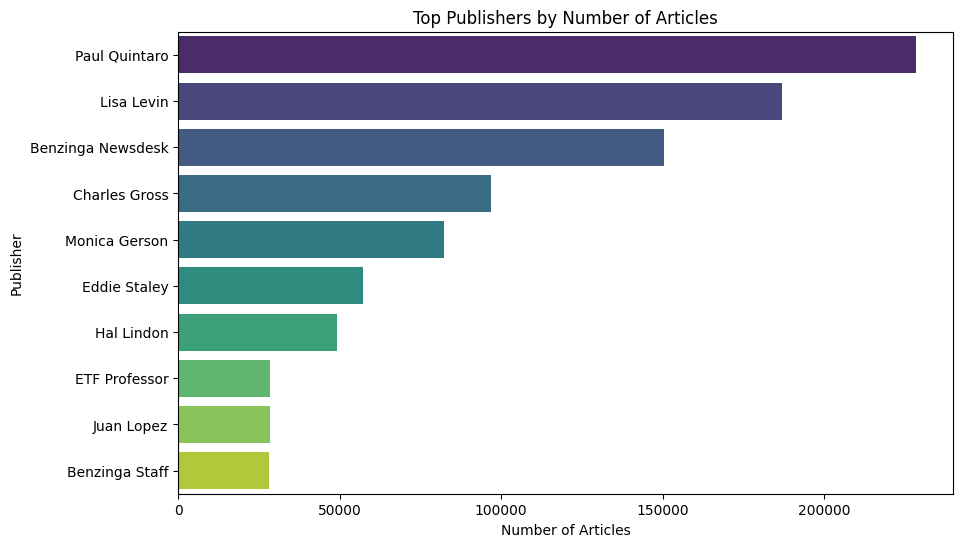

In [133]:
# 1. Analyze which publishers contribute most to the news feed
publisher_count = df['publisher'].value_counts()

# Plotting the top 10 publishers by number of articles
top_publishers = publisher_count.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")
plt.title('Top Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

In [26]:
# Group by publisher and news category
#publisher_type_analysis = df.groupby(['publisher', 'stock']).size().unstack().fillna(0)
stock_count = df['stock'].value_counts()

top_stock = stock_count.head(15)
# Display the result
print(top_stock)


stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
Name: count, dtype: int64


C:\Users\Hello\AppData\Local\Temp\ipykernel_38768\4262875998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stock.values, y=top_stock.index, palette="viridis")


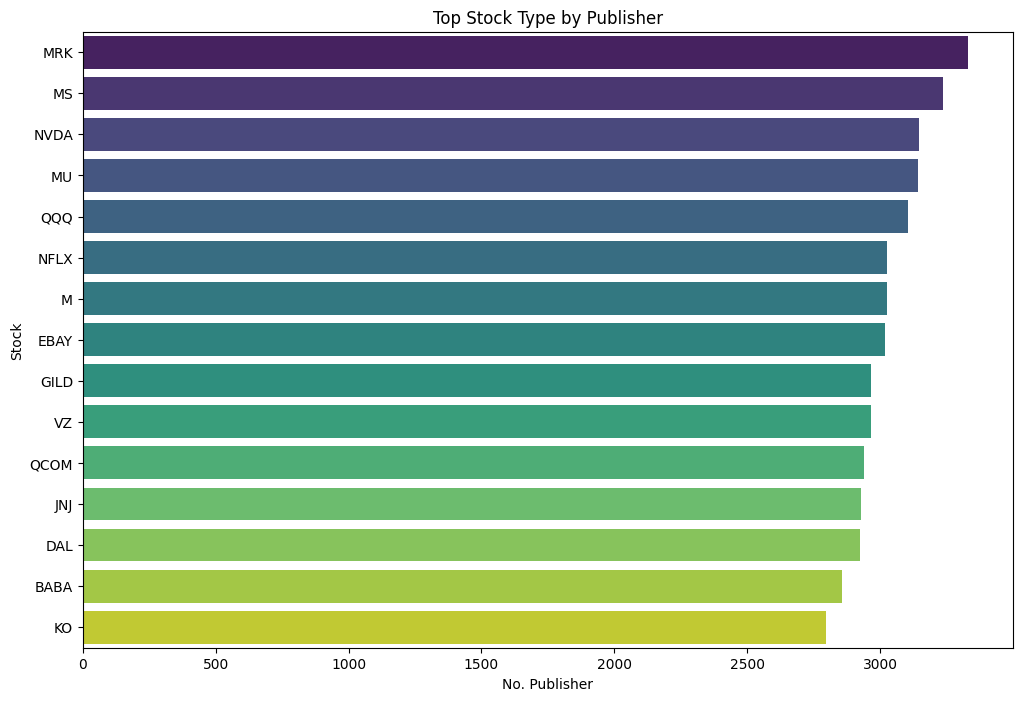

In [29]:
# Plot a heatmap for the type of news by publisher
#top_publishers_type = publisher_type_analysis.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_stock.values, y=top_stock.index, palette="viridis")
plt.title('Top Stock Type by Publisher')
plt.xlabel('No. Publisher')
plt.ylabel('Stock')
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

df = pd.read_csv('raw_analyst_ratings.csv')



In [8]:
# 1. Extract domain names from email addresses
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else None)

In [9]:
# 2. Count the frequency of each domain
domain_count = df['domain'].value_counts()

In [11]:
# 3. Display the top domains
print("Top domains contributing to the news feed:")
print(domain_count.head(10))


Top domains contributing to the news feed:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


C:\Users\Hello\AppData\Local\Temp\ipykernel_38768\3770328812.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_count.values[:10], y=domain_count.index[:10], palette="viridis")


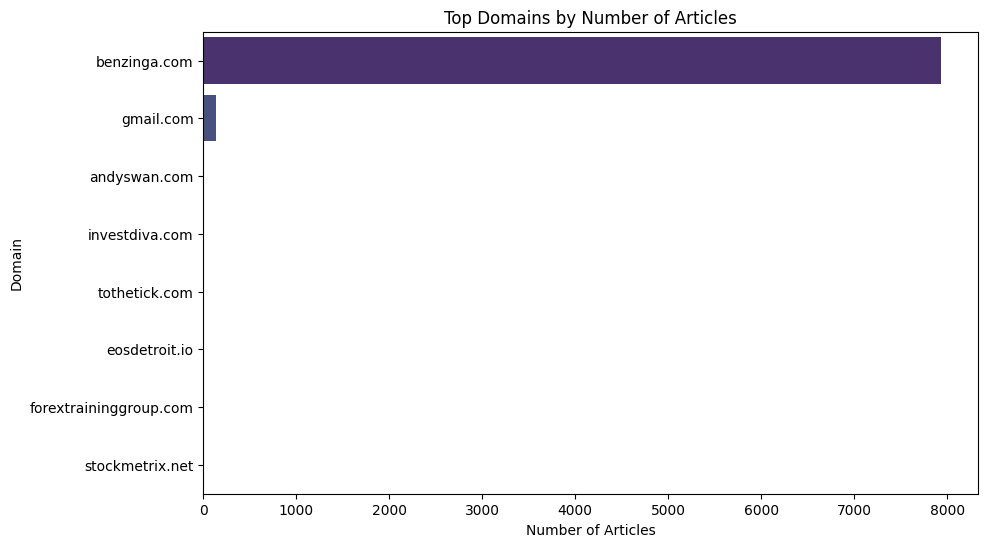

In [12]:
# 4. Plot the top domains by number of articles
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_count.values[:10], y=domain_count.index[:10], palette="viridis")
plt.title('Top Domains by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.show()

In [2]:
import pandas as pd
import talib as ta
import yfinance as yf

# Download historical stock price data
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')




[*********************100%***********************]  1 of 1 completed


In [3]:
# Calculate Moving Averages
data['SMA_50'] = ta.SMA(data['Close'], timeperiod=50)  # Simple Moving Average (50 days)
data['EMA_20'] = ta.EMA(data['Close'], timeperiod=20)  # Exponential Moving Average (20 days)





In [4]:
# Calculate Relative Strength Index (RSI)
data['RSI_14'] = ta.RSI(data['Close'], timeperiod=14)  # RSI with a 14-day period

In [6]:
 #Calculate Moving Average Convergence Divergence (MACD)
data['MACD'], data['MACD_signal'], data['MACD_hist'] = ta.MACD(data['Close'], 
                                                               fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)


In [7]:
# Drop rows with NaN values (resulting from indicator calculations)
data.dropna(inplace=True)

# Display the first few rows with indicators
print(data[['Close', 'SMA_50', 'EMA_20', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].head())

                 Close    SMA_50      EMA_20     RSI_14      MACD  \
Date                                                                
2022-03-15  155.089996  167.6362  161.677988  38.742983 -3.849442   
2022-03-16  159.589996  167.1878  161.479131  45.109011 -3.522346   
2022-03-17  160.619995  166.8062  161.397309  46.480011 -3.143767   
2022-03-18  163.979996  166.5874  161.643279  50.797316 -2.543300   
2022-03-21  165.380005  166.4550  161.999158  52.516092 -1.932183   

            MACD_signal  MACD_hist  
Date                                
2022-03-15    -2.902596  -0.946847  
2022-03-16    -3.026546  -0.495800  
2022-03-17    -3.049990  -0.093777  
2022-03-18    -2.948652   0.405352  
2022-03-21    -2.745358   0.813175  
